In [1]:
from PIL import Image

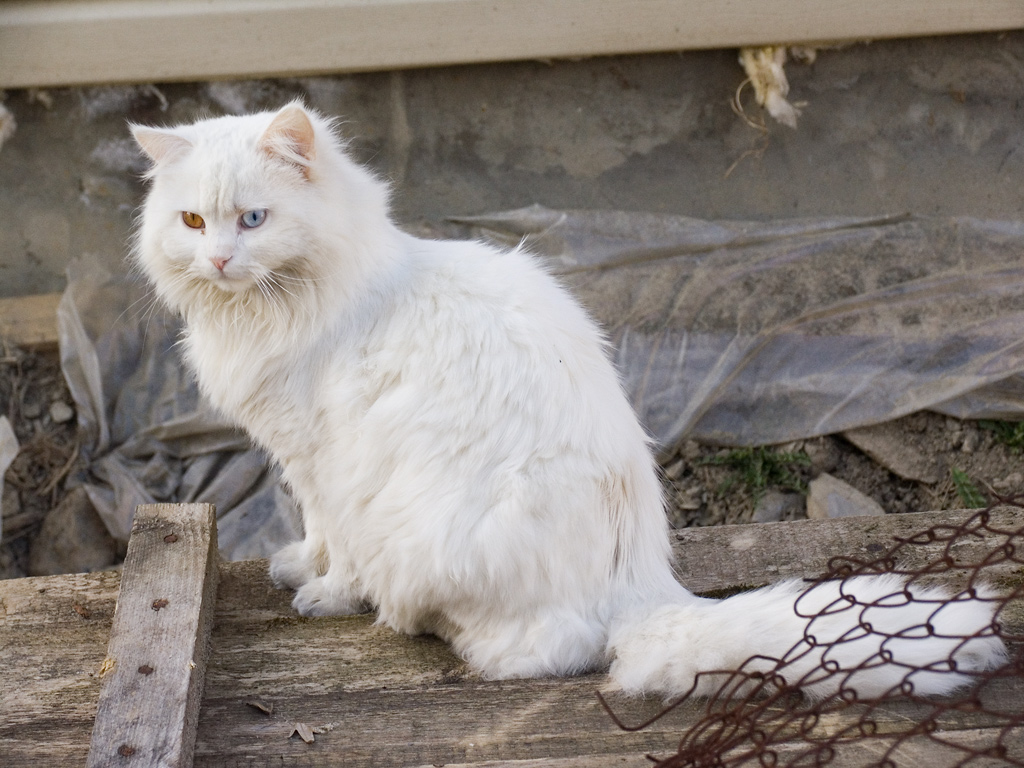

In [26]:
image = Image.open('cat.jpeg')
image

In [5]:
import boto3
client = boto3.client('rekognition',region_name='us-east-1')

In [7]:
with open('cat.jpeg','rb') as img:
    response = client.detect_labels(Image = {'Bytes':img.read()})

In [8]:
response

{'Labels': [{'Name': 'Angora',
   'Confidence': 99.98700714111328,
   'Instances': [],
   'Parents': [{'Name': 'Animal'},
    {'Name': 'Cat'},
    {'Name': 'Mammal'},
    {'Name': 'Pet'}],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Animal',
   'Confidence': 99.98700714111328,
   'Instances': [],
   'Parents': [],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Cat',
   'Confidence': 99.98700714111328,
   'Instances': [{'BoundingBox': {'Width': 0.8703554272651672,
      'Height': 0.7884078621864319,
      'Left': 0.10615421086549759,
      'Top': 0.1232595443725586},
     'Confidence': 95.15201568603516}],
   'Parents': [{'Name': 'Animal'}, {'Name': 'Mammal'}, {'Name': 'Pet'}],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Mammal',
   'Confidence': 99.98700714111328,
   'Instances': [],
   'Parents': [{'Name': 'Animal'}],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}

In [32]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [23]:
bbox_coords = response['Labels'][2]['Instances'][0]['BoundingBox']
bbox_coords

{'Width': 0.8703554272651672,
 'Height': 0.7884078621864319,
 'Left': 0.10615421086549759,
 'Top': 0.1232595443725586}

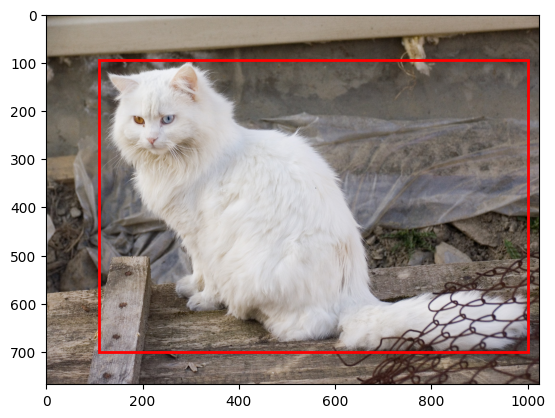

In [37]:
fig,axis = plt.subplots()
axis.imshow(image)
width = bbox_coords['Width']*image.width
height = bbox_coords['Height']*image.height
left = bbox_coords['Left']*image.width
top = bbox_coords['Top']*image.height
            
rect = Rectangle((left,top),width,height,linewidth=2,edgecolor='red',facecolor='none')
axis.add_patch(rect)
plt.show()

In [43]:
# detect faces








with open('salk.jpeg','rb') as img:
    response = client.detect_faces(Image = {'Bytes':img.read()})
response

{'FaceDetails': [{'BoundingBox': {'Width': 0.43410515785217285,
    'Height': 0.436124712228775,
    'Left': 0.31944695115089417,
    'Top': 0.14290358126163483},
   'Landmarks': [{'Type': 'eyeLeft',
     'X': 0.5065548419952393,
     'Y': 0.31264179944992065},
    {'Type': 'eyeRight', 'X': 0.6701182723045349, 'Y': 0.3350710868835449},
    {'Type': 'mouthLeft', 'X': 0.4822967052459717, 'Y': 0.4595974087715149},
    {'Type': 'mouthRight', 'X': 0.6188957095146179, 'Y': 0.47778287529945374},
    {'Type': 'nose', 'X': 0.6075047850608826, 'Y': 0.41359326243400574}],
   'Pose': {'Roll': 11.85715103149414,
    'Yaw': 18.22214126586914,
    'Pitch': -1.6590533256530762},
   'Quality': {'Brightness': 70.54930114746094,
    'Sharpness': 95.51618957519531},
   'Confidence': 99.99995422363281}],
 'ResponseMetadata': {'RequestId': '91d03728-cbd1-49e1-b850-7c84b6f5ea0b',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '91d03728-cbd1-49e1-b850-7c84b6f5ea0b',
   'content-type': 'applica

In [44]:
bbox_coords = response['FaceDetails'][0]['BoundingBox']
bbox_coords

{'Width': 0.43410515785217285,
 'Height': 0.436124712228775,
 'Left': 0.31944695115089417,
 'Top': 0.14290358126163483}

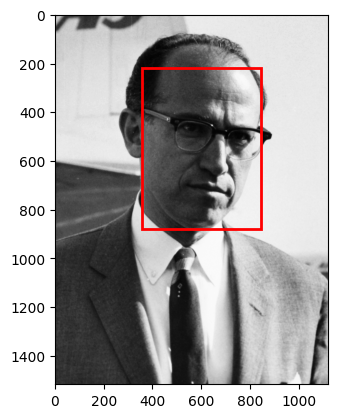

In [49]:

fig,axis = plt.subplots()
image = Image.open('salk.jpeg')
axis.imshow(image,cmap='gray')   #cmap is the color code to use
width = bbox_coords['Width']*image.width
height = bbox_coords['Height']*image.height
left = bbox_coords['Left']*image.width
top = bbox_coords['Top']*image.height
            
rect = Rectangle((left,top),width,height,linewidth=2,edgecolor='red',facecolor='none')
axis.add_patch(rect)
plt.show()

In [51]:
#detecting text in the image


with open('text.png','rb') as img:
    response = client.detect_text(Image = {'Bytes':img.read()})
response

{'TextDetections': [{'DetectedText': 'Pierian',
   'Type': 'LINE',
   'Id': 0,
   'Confidence': 100.0,
   'Geometry': {'BoundingBox': {'Width': 0.32852956652641296,
     'Height': 0.123046875,
     'Left': 0.05759083852171898,
     'Top': 0.0380859375},
    'Polygon': [{'X': 0.05759083852171898, 'Y': 0.0380859375},
     {'X': 0.38612040877342224, 'Y': 0.0380859375},
     {'X': 0.38612040877342224, 'Y': 0.1611328125},
     {'X': 0.05759083852171898, 'Y': 0.1611328125}]}},
  {'DetectedText': 'Training',
   'Type': 'LINE',
   'Id': 1,
   'Confidence': 98.44119262695312,
   'Geometry': {'BoundingBox': {'Width': 0.4090258479118347,
     'Height': 0.17578120529651642,
     'Left': 0.5831072330474854,
     'Top': 0.0283203125},
    'Polygon': [{'X': 0.5831072330474854, 'Y': 0.0283203125},
     {'X': 0.9921330809593201, 'Y': 0.0283203125},
     {'X': 0.9921330809593201, 'Y': 0.20410151779651642},
     {'X': 0.5831072330474854, 'Y': 0.20410151779651642}]}},
  {'DetectedText': 'In this lecture, 

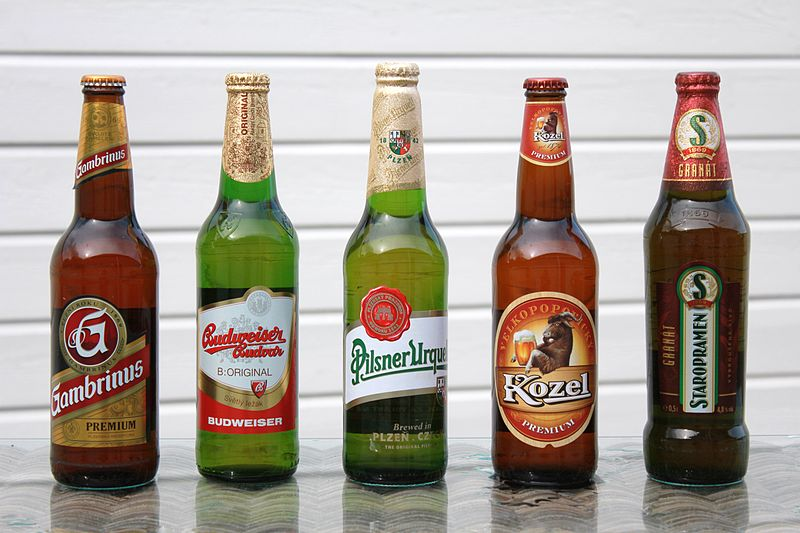

In [55]:
#moderation_labels
image = Image.open('beer.jpeg')
image

In [56]:
with open('beer.jpeg','rb') as img:
    response = client.detect_moderation_labels(Image = {'Bytes':img.read()})
response

{'ModerationLabels': [{'Confidence': 97.6474380493164,
   'Name': 'Alcoholic Beverages',
   'ParentName': 'Alcohol'},
  {'Confidence': 97.6474380493164, 'Name': 'Alcohol', 'ParentName': ''}],
 'ModerationModelVersion': '6.1',
 'ResponseMetadata': {'RequestId': 'db7395b8-a85b-426b-9050-9629ec03ef64',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'db7395b8-a85b-426b-9050-9629ec03ef64',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '202',
   'date': 'Mon, 30 Oct 2023 18:05:15 GMT'},
  'RetryAttempts': 0}}